# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan


- **Nama:** Krisdayanti Siska Oktavia Simbolon
- **Email:** krisdayantisiskaoktavia@gmail.com
- **ID Dicoding:** krisokt27

## **1. Persiapan**
Pada tahap ini melakukan persiapan sebelum modelling, dimulai dari menyiapkan library dengan cara import library yang digunakan dan menyiapkan dataset yang akan digunakan untuk membuat model.

### Menyiapkan library yang dibutuhkan
Proses mengimport library yang digunakan pada model.

In [ ]:
# Mengimport library yang digunakan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Menyiapkan data yang akan diguankan
Memuat url dataset dan menampilkan 5 baris teratas dari dataset

In [ ]:
# Menyiapkan dataset
url = 'https://drive.google.com/uc?id=1OptTsAiIoD28o9c9qPOIUgPCFVMBlGPR'
df = pd.read_csv(url, sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## **2. Data Understanding**
Pada tahap ini merupakan proses untuk memahami karakteristik dataset yang digunakan.

In [ ]:
# Menampilkan informasi umum dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
# Memeriksa jumlah dataset
df.shape

(4424, 37)

## **3. Data Preparation / Preprocessing**
Pada tahapan ini dilakukan proses memeriksa nilai yang hilang, data duplikasi, melabeli fitur kategorikal, memeriksa korelasi antar fitur, menampilkan data statistik, memeriksa dan membersihkan outlier, melakukan EDA (untuk memahami pola data) hingga persiapan akhir sebelum modelling yaitu menghapus label untuk visualisasi, melakukan SMOTE dan memisahkan fitur target serta membagi data dengan rasio 80:20.

In [ ]:
# Memeriksa missing values
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


**Insight:**

Berdasarkan kolom diatas, tidak ditemukan missing values pada data

In [ ]:
# Memeriksa data duplikat
print(f'jumlah duplicated data: {df.duplicated().sum()}')

jumlah duplicated data: 0


In [ ]:
# Encoding fitur kategorikal
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

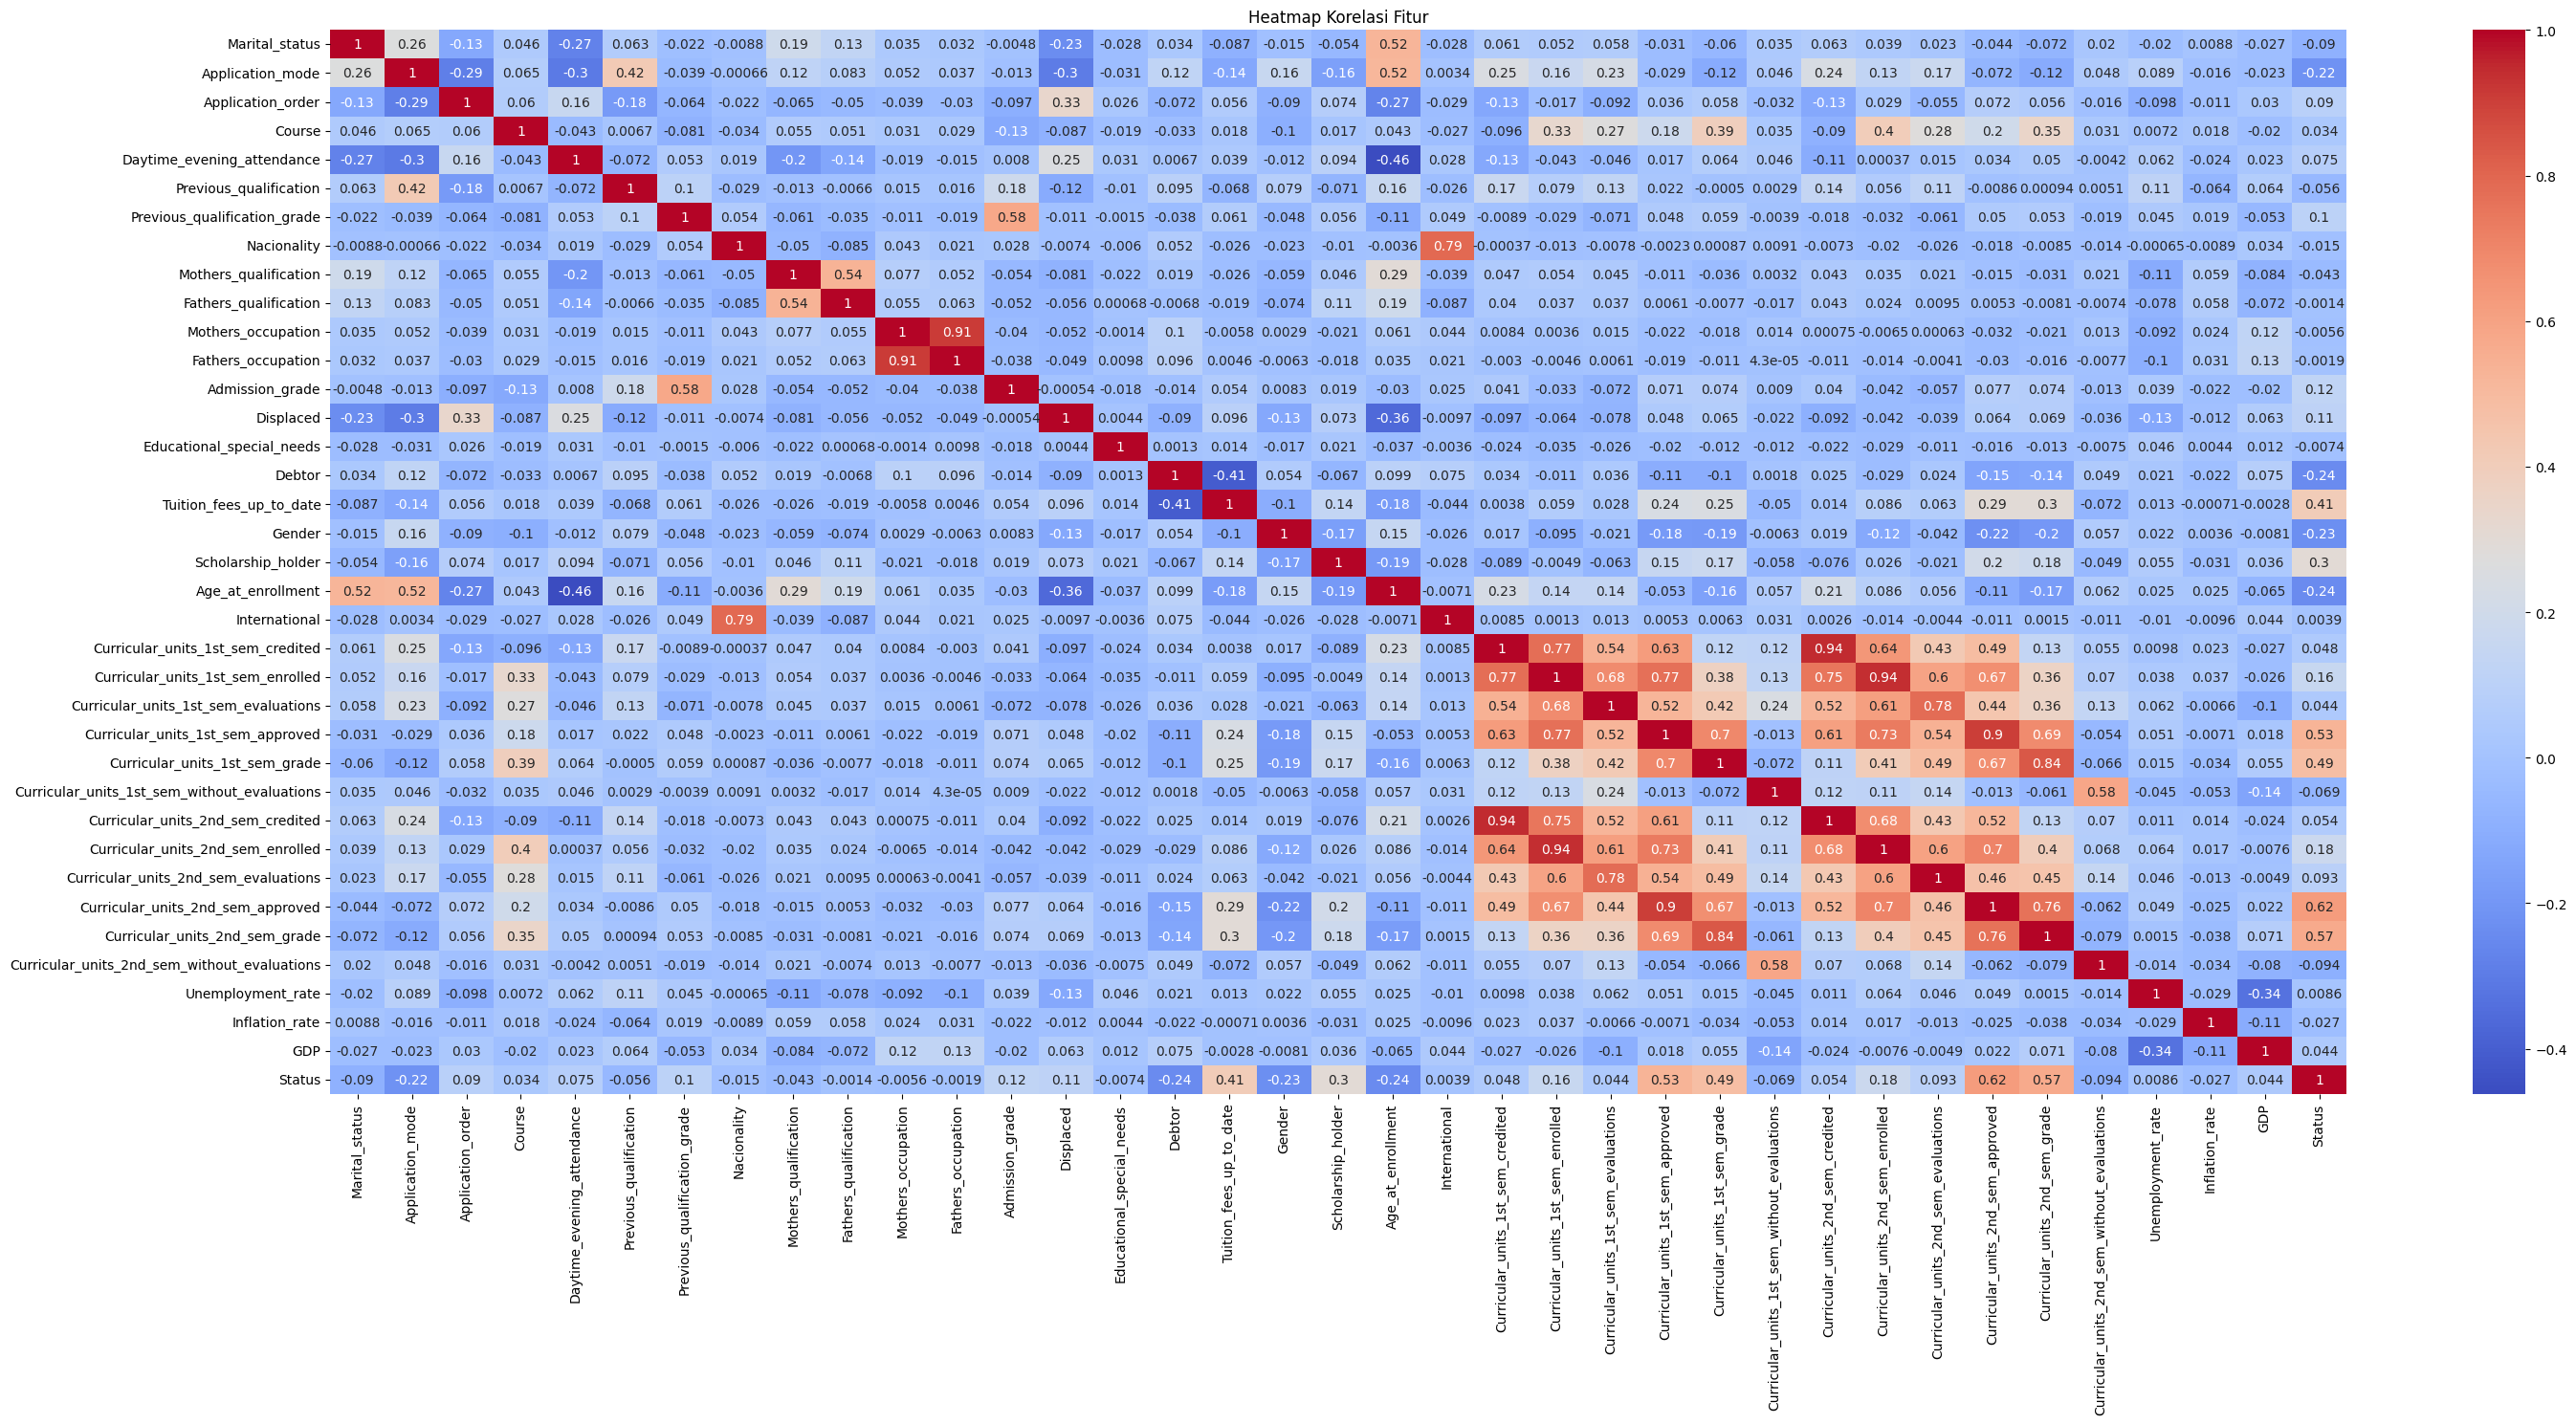

In [ ]:
# Mmebuat heatmap untuk melihat korelasi
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan analisis heatmap korelasi, ditemukan beberapa fitur penting yang berpotensi menjawab pertanyaan utama mengenai alasan mahasiswa mengalami dropout. Fitur-fitur ini dipilih untuk dieksplorasi lebih lanjut dan divisualisasikan guna memahami pola serta hubungan yang relevan.

1. Distribusi Status Mahasiswa: Memberikan gambaran umum mengenai status mahasiswa, termasuk kategori aktif, tidak aktif, atau dropout.
2. Scholarship_holder vs Status: Menjelaskan hubungan antara penerimaan beasiswa dengan status mahasiswa, untuk memahami bagaimana dukungan finansial memengaruhi keberlanjutan studi.
3. Admission Grade vs Status: Menggambarkan korelasi antara nilai penerimaan awal dan keberlanjutan studi mahasiswa.
4. Debtor vs Status: Mengevaluasi dampak tunggakan pembayaran terhadap kemungkinan mahasiswa dropout.
5. Curricular_units_1st_sem_approved vs Status: Mengungkap hubungan antara jumlah mata kuliah yang disetujui di semester pertama dan status mahasiswa.
6. Jumlah Mata Kuliah Semester 1 vs Status: Mengkaji beban studi awal mahasiswa dan dampaknya terhadap risiko dropout.
7. Educational_special_needs vs Status: Meneliti bagaimana kebutuhan pendidikan khusus dapat memengaruhi status akademik mahasiswa.
8. Tuition_fees_up_to_date vs Status: Mengidentifikasi pengaruh pembayaran uang kuliah tepat waktu terhadap keberlanjutan studi mahasiswa.
9. Curricular_units_2nd_sem_approved vs Status: Menyoroti pola keberhasilan akademik di semester kedua dan kaitannya dengan status mahasiswa.
10. Father_occupation vs Status (Top 10): Mengeksplorasi pengaruh profesi ayah sebagai faktor sosial-ekonomi yang relevan terhadap status mahasiswa.

In [ ]:
# Menampilkan data deskrpitif statistik
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


**Insight**

Berdasarkan tabel statistik deskriptif di atas, diperoleh beberapa insight sebagai berikut:

1. Profil Mahasiswa
Mayoritas mahasiswa belum menikah, mengikuti kelas siang, dan memiliki nilai kualifikasi sebelumnya yang cukup tinggi.

2. Latar Belakang Orang Tua
Pendidikan orang tua didominasi oleh tingkat rendah hingga menengah, dengan jenis pekerjaan yang cukup beragam.

3. Kondisi Mahasiswa
Sebagian besar mahasiswa tidak memiliki utang pendidikan. Penerima beasiswa tergolong sedikit, dan mayoritas membayar biaya kuliah secara tepat waktu.

4. Performa Akademik
Mahasiswa rata-rata mengambil enam mata kuliah per semester dengan tingkat kelulusan sekitar lima mata kuliah.  
Terdapat sebagian mahasiswa yang tidak mengikuti evaluasi sama sekali, yang dapat menjadi indikator potensi risiko dropout.

5. Faktor Eksternal
Tingkat pengangguran yang cukup tinggi berpotensi memengaruhi keberlanjutan studi mahasiswa.

6. Status Mahasiswa
Sebagian besar mahasiswa masih aktif atau telah lulus, meskipun terdapat pula yang mengalami dropout.

Terdapat beberapa indikasi outlier pada fitur seperti `Previous_qualification`, `Nacionality`, `Curricular_units_2nd_sem_without_evaluations` `Curricular_units_2nd_sem_enrolled`, dan `Curricular_units_2nd_sem_approved`. Semua kolom ini akan ditinjau lebih lanjut menggunakan visualisasi boxplot untuk memastikan keberadaannya dan ditangani sesuai dengan pendekatan yang relevan.

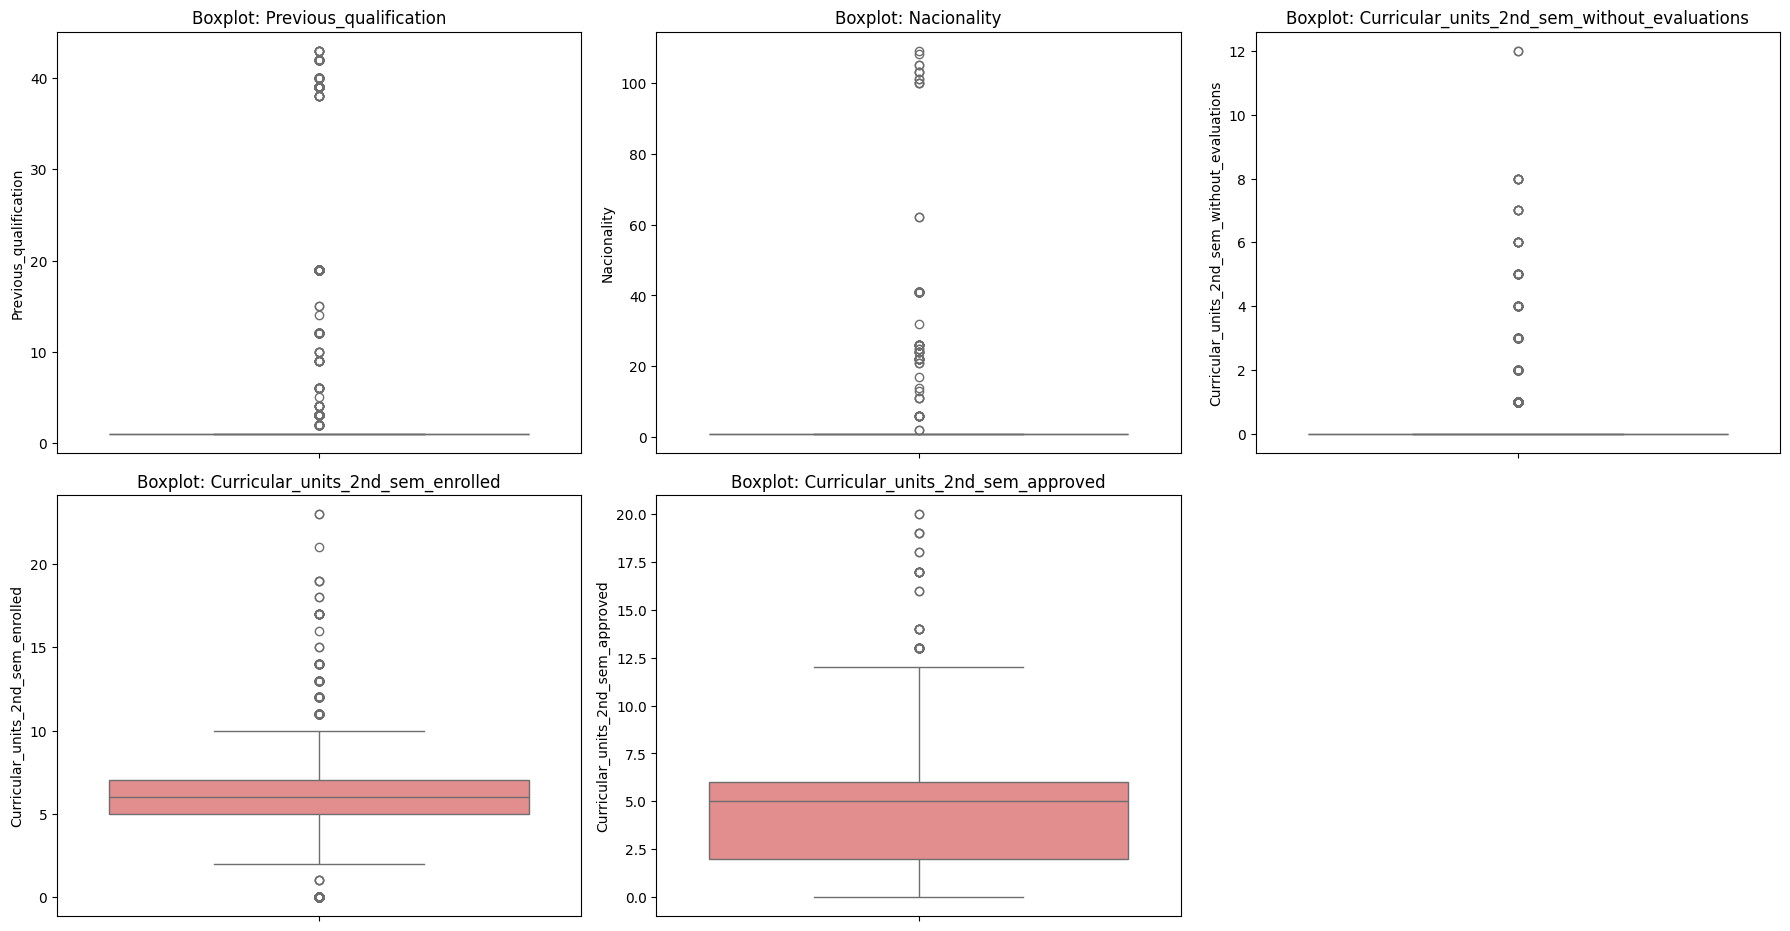

In [ ]:
# Visualisasi outlier
# Daftar kolom yang berpotensi mengandung outlier
outlier_cols = ['Previous_qualification', 'Nacionality', 'Curricular_units_2nd_sem_without_evaluations',
                'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_approved']

# Boxplot untuk tiap kolom
plt.figure(figsize=(18, 14))
for i, col in enumerate(outlier_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan boxplot diatas, didapatkan informasi bahwa:
1. Previous_qualification & Nationality
  Terdapat banyak outlier, sebagian besar data berada di nilai rendah (0–1), sedangkan beberapa nilai ekstrem menyimpang jauh.

2. Curricular_units_2nd_sem_without_evaluations
  Terlihat angat banyak outlier, distribusi sangat tidak seimbang, artinya adanya data yang tidak valid atau kasus khusus.

3. Curricular_units_2nd_sem_enrolled & approved
  Distribusi pada kolom ini terlihat normal tapi outlier kolom ini cukup banyak di nilai tinggi (enrolled > 15, approved > 12).

Dari hasil ini, outlier pada kolom ini akan dihandling menggunakan metode IQR

In [ ]:
# Handling outlier
# Fungsi untuk hapus outlier berdasarkan IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter data di dalam rentang normal
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Menerapkan fungsi menghapus outlier
df = remove_outliers_iqr(df, outlier_cols)

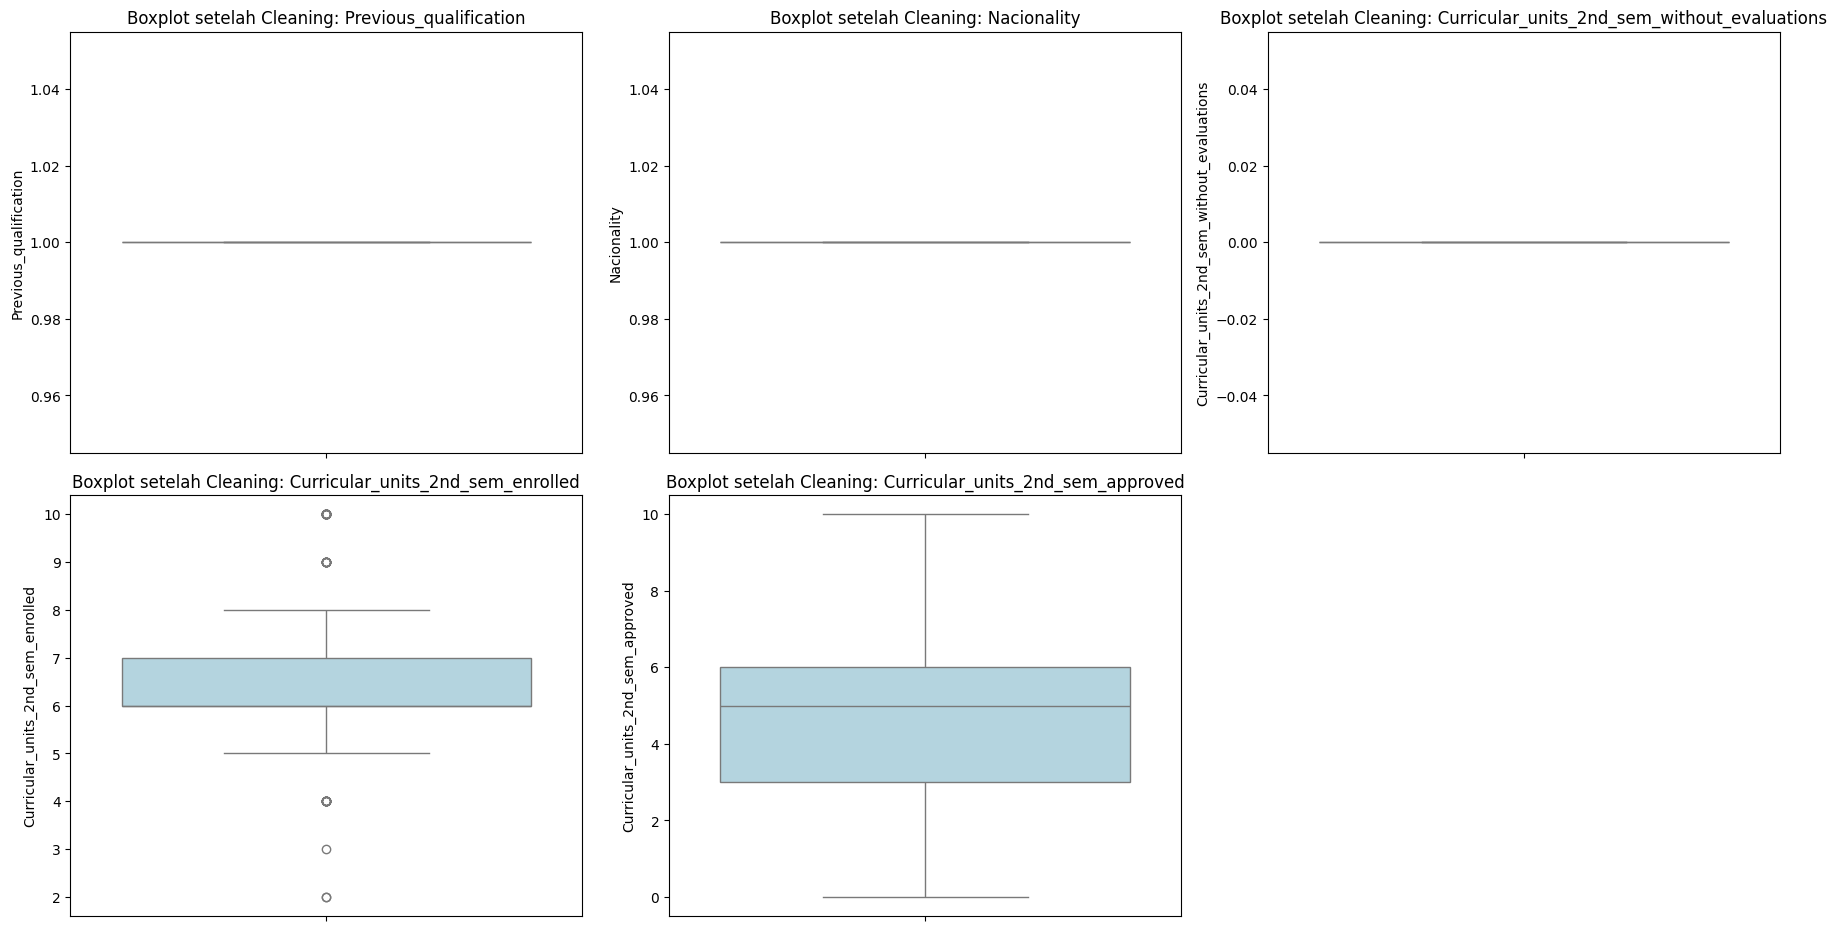

In [ ]:
# Memeriksa kembali outlier
plt.figure(figsize=(18, 14))
for i, col in enumerate(outlier_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot setelah Cleaning: {col}')
    plt.tight_layout()
plt.show()

**Insight:**

Setelah outlier di handling, berikut adalah insight yang didapatkan:

1. Previous_qualification & Nationality
  Semua nilai ekstrem telah dibersihkan, menyisakan nilai tunggal (mungkin hanya data dominan yang dipertahankan).

2. Curricular_units_2nd_sem_without_evaluations
  Terlihat bahwa data yang tidak valid telah dihapus.

3. Curricular_units_2nd_sem_enrolled & approved
  Outlier sudah dihapus, distribusi jadi lebih rapi dan normal, artinya cleaning berhasil menjaga representasi data.

#### Exploratory Data Analysis
Melakukan eksplorasi data untuk memahami pola data.

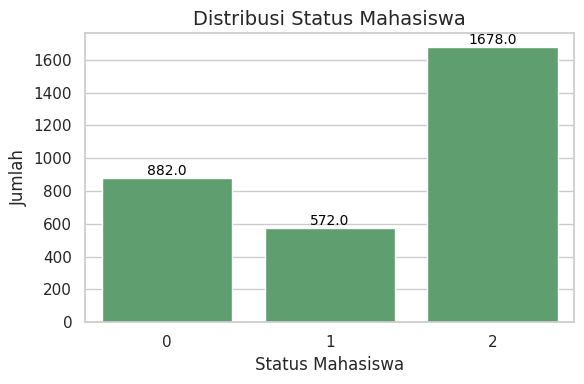

In [ ]:
# Visualisasi Distribusi Status Mahasiswa
plt.figure(figsize=(6,4))
sns.set(style="whitegrid")
ax = sns.countplot(data=df, x='Status', color='#55a868')

# Tambahin angka di atas setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black')

# Label dan judul
plt.title('Distribusi Status Mahasiswa', fontsize=14)
plt.xlabel('Status Mahasiswa', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan visualisasi diatas terlihat bawa ada 3 kategori status mahasiswa:
  * 0: Dropout (Keluar)
  * 1: Enrolled (Masih aktif)
  * 2: Graduate (Lulus)

Mayoritas mahasiswa berada pada status lulus (1678 orang). Dropout mencapai 882 mahasiswa, menunjukkan tingkat putus studi yang cukup tinggi. Mahasiswa aktif sebanyak 572 orang, relatif lebih sedikit. Dapat disimpulkan bahwa meskipun banyak yang berhasil lulus, dropout rate juga harus jadi perhatian dalam evaluasi sistem pendidikan. Selain itu, terlihat bahwa data target imbalance, sehingga kolom ini akan dilakukan SMOTE untuk menyeimbangkan data.

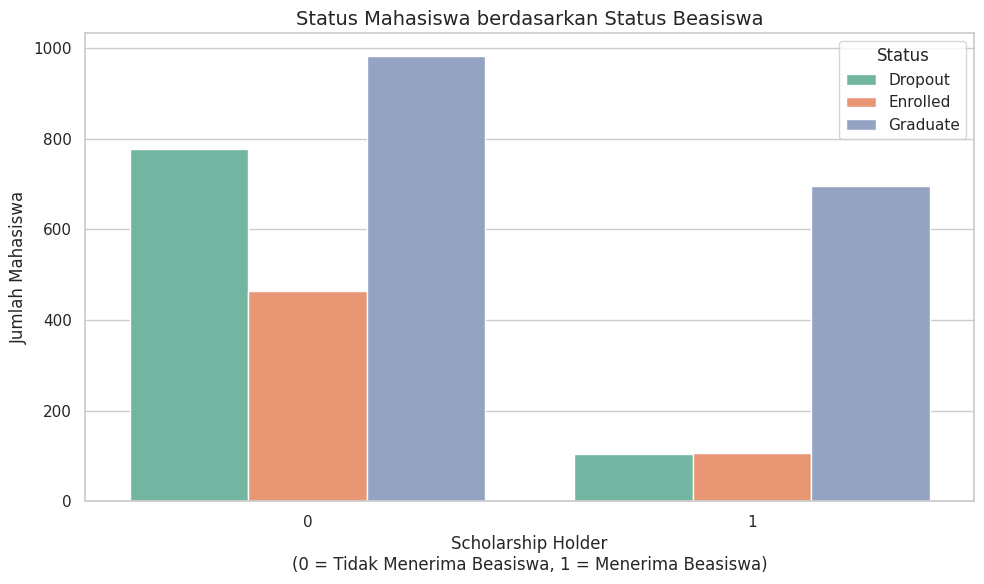

In [ ]:
# Visualisasi distribusi Scholarship_holder vs Status
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='Scholarship_holder', hue='Status', palette='Set2')

# Tambahkan judul dan label
plt.title('Status Mahasiswa berdasarkan Status Beasiswa', fontsize=14)
plt.xlabel('Scholarship Holder\n(0 = Tidak Menerima Beasiswa, 1 = Menerima Beasiswa)', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)

# Tambahkan legenda dengan label yang lebih ramah
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['Dropout', 'Enrolled', 'Graduate'], title='Status', loc='upper right')

plt.tight_layout()
plt.show()


**Insight:**

Berdasarkan visualisasi diatas terlihat bahwa mahasiswa tanpa beasiswa mendominasi semua kategori, terutama pada Dropout dan Graduate. Mahasiswa penerima beasiswa punya angka dropout dan enrolled yang jauh lebih kecil, tapi tetap menunjukkan tingkat kelulusan yang tinggi (lebih kurang 700). Maka, dapat disimpulkan bahwa beasiswa tampaknya berkorelasi positif terhadap penyelesaian studi, meskipun jumlah penerima masih terbatas.

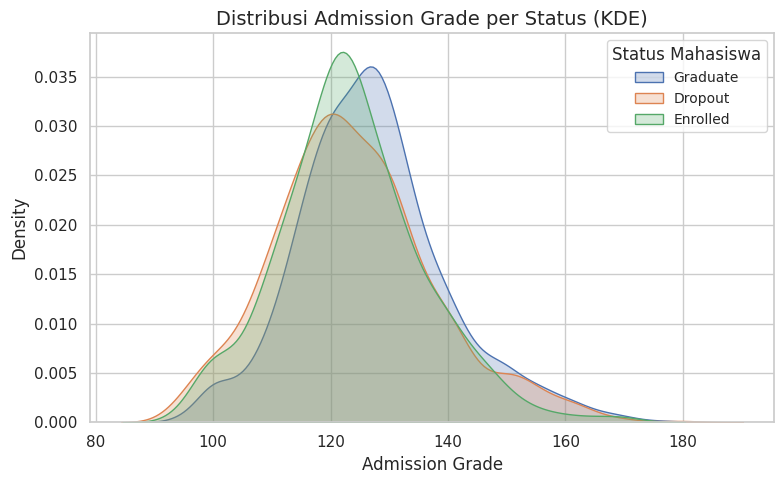

In [ ]:
# Visualisasi distribusi Admission Grade vs Status
# Mapping label angka ke label string
status_map = {
    0: 'Dropout',
    1: 'Enrolled',
    2: 'Graduate'
}

plt.figure(figsize=(8,5))

for s in df['Status'].unique():
    label_nama = status_map.get(s, s)  # ambil nama jika ada, kalau gak ada pakai aslinya
    sns.kdeplot(df[df['Status'] == s]['Admission_grade'], label=label_nama, fill=True)

plt.title('Distribusi Admission Grade per Status (KDE)', fontsize=14)
plt.xlabel('Admission Grade', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend(title='Status Mahasiswa', title_fontsize=12, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan visualisasi ini, dapat disimpulkan bahwa mahasiswa lulus (Graduate) cenderung memiliki admission grade yang lebih tinggi dibanding yang dropout dan masih enrolled. Mahasiswa yang dropout punya distribusi nilai masuk yang sedikit lebih ke kiri (lebih rendah). Mahasiswa yang masih enrolled cenderung berada di antara keduanya, namun lebih mirip dengan dropout. Bisa disimpulkan bahwa admission grade bisa menjadi indikator awal potensi keberhasilan mahasiswa. Semakin tinggi nilainya, semakin besar peluang untuk menyelesaikan studi.

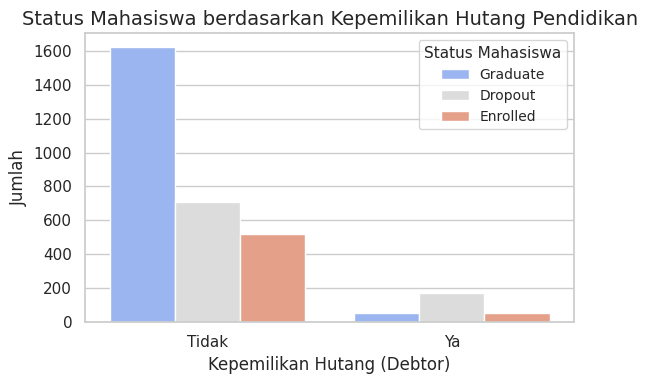

In [ ]:
# Visualisasi Debtor vs Status
# Mapping status numerik ke label
status_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
df['Status_label'] = df['Status'].map(status_mapping)

# Visualisasi Debtor vs Status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Debtor', hue='Status_label', palette='coolwarm')

plt.title('Status Mahasiswa berdasarkan Kepemilikan Hutang Pendidikan', fontsize=14)
plt.xlabel('Kepemilikan Hutang (Debtor)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Ganti label sumbu X biar lebih jelas
plt.xticks([0, 1], ['Tidak', 'Ya'])

# Legend otomatis tampil rapi sesuai label
plt.legend(title='Status Mahasiswa', title_fontsize=11, fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan visualisasi diatas, mayoritas mahasiswa yang lulus tidak memiliki hutang, jumlahnya sangat tinggi. Dropout paling banyak berasal dari mahasiswa tanpa hutang, tapi yang punya hutang juga menunjukkan dropout cukup besar secara proporsional. Mahasiswa dengan hutang tampaknya memiliki kecenderungan dropout lebih tinggi dibandingkan yang lulus. Dapat dikatakan bahwa faktor ekonomi seperti hutang pendidikan bisa menjadi beban mental dan finansial yang memengaruhi kelanjutan studi mahasiswa.

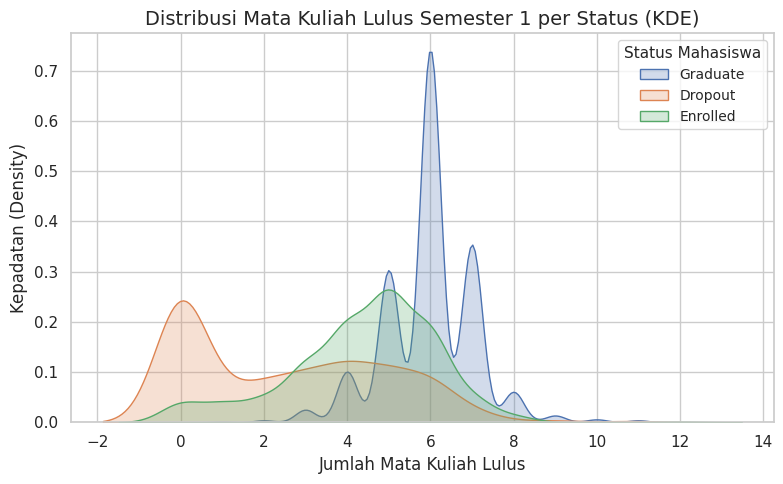

In [ ]:
# Visualisasi Curricular_units_1st_sem_approved vs Status
# Mapping status numerik ke label (kalau belum dilakukan)
status_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
df['Status_label'] = df['Status'].map(status_mapping)

# Visualisasi KDE: Curricular_units_1st_sem_approved vs Status
plt.figure(figsize=(8,5))
for status in df['Status_label'].unique():
    sns.kdeplot(
        df[df['Status_label'] == status]['Curricular_units_1st_sem_approved'],
        label=status,
        fill=True
    )

plt.title('Distribusi Mata Kuliah Lulus Semester 1 per Status (KDE)', fontsize=14)
plt.xlabel('Jumlah Mata Kuliah Lulus', fontsize=12)
plt.ylabel('Distribusi', fontsize=12)
plt.legend(title='Status Mahasiswa', title_fontsize=11, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan visualisasi diatas, terlihat bahwa mahasiswa yang lulus (Graduate) umumnya menyelesaikan 6–7 mata kuliah di semester 1, terlihat dari puncak distribusi yang tajam. Sebaliknya, mahasiswa Dropout banyak yang hanya lulus 0–2 mata kuliah, menunjukkan kemungkinan kendala akademik sejak awal. Mahasiswa Enrolled memiliki distribusi yang lebih menyebar, dengan puncak di sekitar 4–5 mata kuliah, mungkin karena masih dalam proses studi.

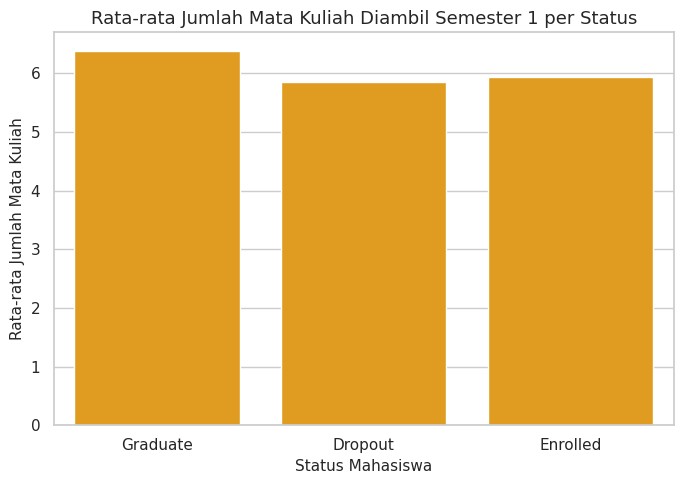

In [ ]:
# Visualisasi Jumlah Mata Kuliah Semester 1 vs Status
# Mapping Status ke label jika masih angka
status_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
df['Status_label'] = df['Status'].map(status_mapping)

# Barplot
plt.figure(figsize=(7,5))
sns.barplot(
    data=df,
    x='Status_label',
    y='Curricular_units_1st_sem_enrolled',
    estimator='mean',
    errorbar=None,
    color='orange'
)

plt.title('Rata-rata Jumlah Mata Kuliah Diambil Semester 1 per Status', fontsize=13)
plt.xlabel('Status Mahasiswa', fontsize=11)
plt.ylabel('Rata-rata Jumlah Mata Kuliah', fontsize=11)
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan visualisasi diatas terlihat bahwa mahasiswa Graduate mengambil lebih banyak mata kuliah di semester 1 (6.3) dibanding Dropout (5.8) dan Enrolled (5.9). Artinya mahasiswa graduate cenderung lebih agresif sejak awal dalam mengambil beban studi.


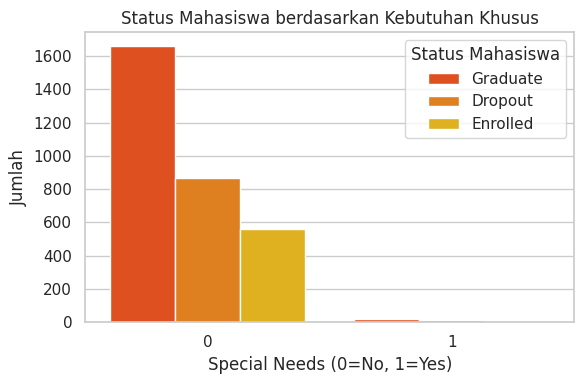

In [ ]:
# Visualisasi Educational_special_needs vs Status
df['Status_label'] = df['Status'].replace({
    0: 'Dropout',
    1: 'Enrolled',
    2: 'Graduate'
})

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Educational_special_needs', hue='Status_label', palette='autumn')
plt.title('Status Mahasiswa berdasarkan Kebutuhan Khusus')
plt.xlabel('Special Needs (0=No, 1=Yes)')
plt.ylabel('Jumlah')
plt.legend(title='Status Mahasiswa')
plt.tight_layout()
plt.show()


**Insight:**

Berdasarkan visualisasi diatas terlihat bahwa mayoritas mahasiswa tidak memiliki kebutuhan khusus (kode 0), dan dari kelompok ini, sebagian besar berhasil lulus (Graduate). Sementara itu, jumlah mahasiswa dengan kebutuhan khusus (kode 1) sangat sedikit, dan hampir seluruhnya berada pada status "Graduate", menunjukkan kemungkinan adanya dukungan khusus yang efektif atau jumlah data yang sangat kecil.

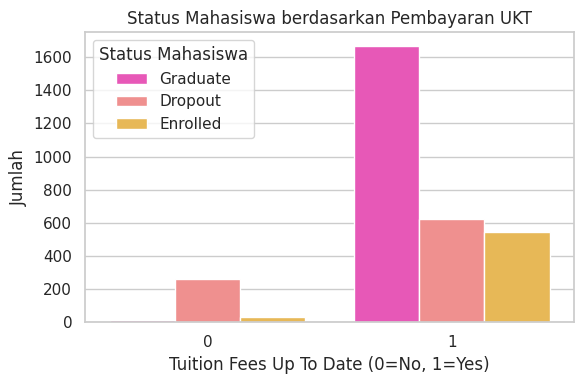

In [ ]:
# Tuition_fees_up_to_date vs Status
# Buat label status kalau belum ada
df['Status_label'] = df['Status'].replace({
    0: 'Dropout',
    1: 'Enrolled',
    2: 'Graduate'
})

# Visualisasinya
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Tuition_fees_up_to_date', hue='Status_label', palette='spring')
plt.title('Status Mahasiswa berdasarkan Pembayaran UKT')
plt.xlabel('Tuition Fees Up To Date (0=No, 1=Yes)')
plt.ylabel('Jumlah')
plt.legend(title='Status Mahasiswa')
plt.tight_layout()
plt.show()


**Insight:**

Berdasarkan visualisasi diatas terlihat bahwa mahasiswa yang UKT-nya lancar (1) jauh lebih dominan menjadi Graduate. Sebaliknya, keterlambatan atau tunggakan pembayaran UKT cukup terkait dengan status Dropout.

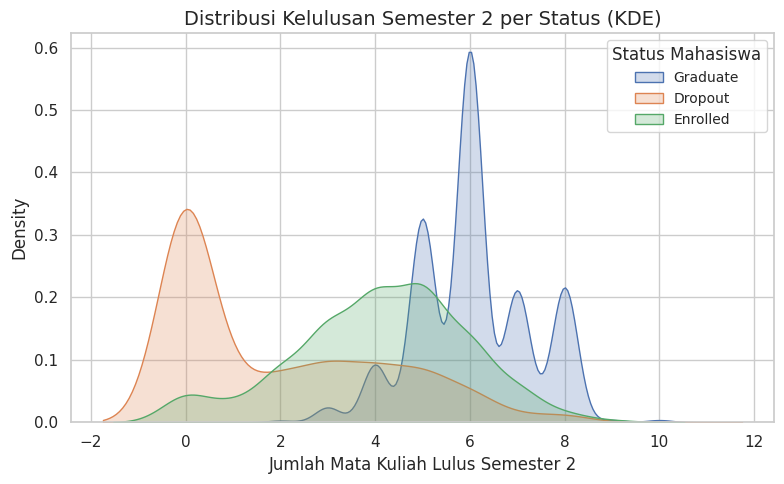

In [ ]:
# Curricular_units_2nd_sem_approved vs Status
# Mapping label status
status_labels = {
    0: 'Dropout',
    1: 'Enrolled',
    2: 'Graduate'
}

plt.figure(figsize=(8,5))
for s in df['Status'].unique():
    label = status_labels.get(s, str(s))
    sns.kdeplot(df[df['Status'] == s]['Curricular_units_2nd_sem_approved'], label=label, fill=True)

plt.title('Distribusi Kelulusan Semester 2 per Status (KDE)', fontsize=14)
plt.xlabel('Jumlah Mata Kuliah Lulus Semester 2', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Status Mahasiswa', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()


**Insight:**

Berdasarkan visualisasi diatas terlihat bahwa mahasiswa yang lulus (Graduate) tetap menunjukkan konsistensi, dengan puncak distribusi di sekitar 6–7 mata kuliah lulus, menandakan performa akademik yang stabil. Mahasiswa Dropout cenderung hanya lulus sedikit atau tidak ada mata kuliah sama sekali di semester 2, yang memperkuat pola dari semester 1—yaitu kemungkinan masalah akademik berkelanjutan. Mahasiswa Enrolled memiliki sebaran distribusi yang lebih datar dan menyebar di angka 3–5 mata kuliah, mencerminkan variasi performa mahasiswa yang masih aktif.

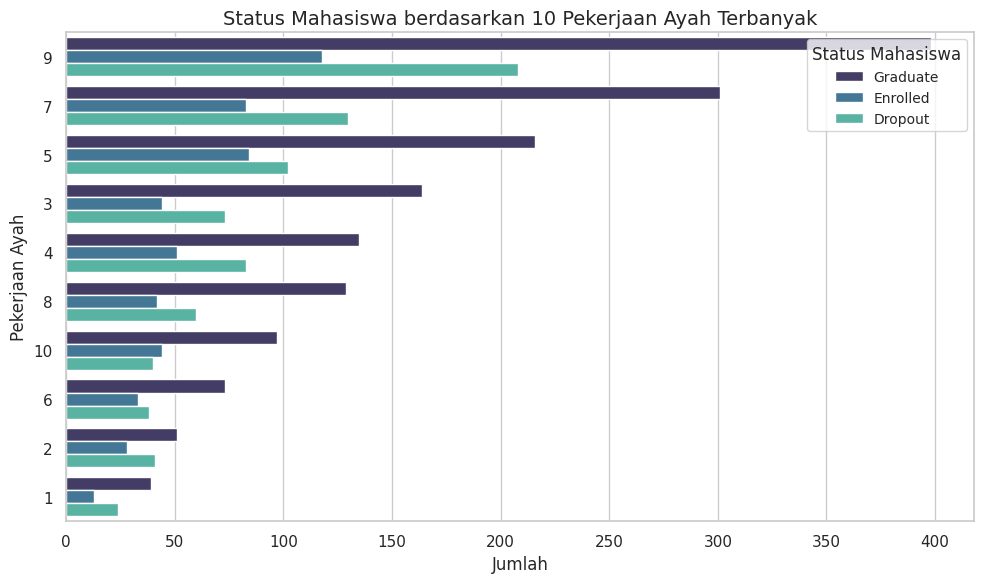

In [ ]:
# Visualisasi Father_occupation vs Status (Top 10)
# Mapping label status
status_labels = {
    0: 'Dropout',
    1: 'Enrolled',
    2: 'Graduate'
}

# Salin DataFrame & ubah Status ke label
filtered_df = df[df['Fathers_occupation'].isin(
    df['Fathers_occupation'].value_counts().head(10).index
)].copy()
filtered_df['Status'] = filtered_df['Status'].map(status_labels)

plt.figure(figsize=(10,6))
sns.countplot(
    data=filtered_df,
    y='Fathers_occupation',
    hue='Status',
    palette='mako',
    order=df['Fathers_occupation'].value_counts().head(10).index
)
plt.title('Status Mahasiswa berdasarkan 10 Pekerjaan Ayah Terbanyak', fontsize=14)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Pekerjaan Ayah', fontsize=12)
plt.legend(title='Status Mahasiswa', title_fontsize=12, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()


**Insight:**

Mahasiswa dengan status "Graduate" mendominasi hampir semua kategori pekerjaan ayah, terutama pada pekerjaan ayah nomor 9, 7, dan 5.
Hal ini menunjukkan bahwa pekerjaan ayah tertentu kemungkinan memiliki kontribusi dalam mendukung keberhasilan studi anaknya.
Namun, jumlah mahasiswa "Dropout" dan "Enrolled" juga cukup signifikan pada beberapa pekerjaan ayah, terutama pekerjaan ayah nomor 9 dan 7, yang menunjukkan bahwa faktor pekerjaan ayah bukan satu-satunya penentu keberhasilan studi.

#### Processing Data Sebelum Modelling
Pembersihan data dari drop kolom yang tidak dibutuhkan selama membuat model, memisahkan fitur target, menerapkan SMOTE untuk menyelesaikan masalah imbalance data, dan melakukan pembagian data dengan rasio 80:20

In [ ]:
# Drop kolom'Status_label' pada visualisasi
df = df.drop('Status_label', axis=1)

In [ ]:
# Memisahkan fitur X dan y
X = df.drop('Status', axis=1)
y = df['Status']

In [ ]:
# Menerapkan SMOTE pada dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Train-test split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## **4. Modeling**
Tahapan ini proses membuat model, dimana model yang dibangun menggunakan 2 algoritma, yaitu:
1. Random Forest
2. Logistic Regression

In [ ]:
# Membuat Model Random Forest
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Standarisasi kolom X sebelum membuat model
scaler = StandardScaler()
X_train_lr = scaler.fit_transform(X_train)
X_test_lr = scaler.transform(X_test)

# Membuat Model logistic regression
model_lr = LogisticRegression(solver='saga', max_iter=1000)
model_lr.fit(X_train_lr, y_train)

LogisticRegression(max_iter=1000, solver='saga')

## **5. Evaluation**
Tahapan ini melakukan evaluasi terhadap 2 model yang telah dibangun menggunakan metrik.

In [ ]:
# Prediksi target (y) model random forest
y_pred_rf = model_rf.predict(X_test)

# Prediksi target (y) model logistic regression
y_pred_lr = model_lr.predict(X_test_lr)

In [ ]:
# Menampilkan confusion matrix model random forest
print(confusion_matrix(y_test, y_pred_rf))
print(f'classification report model random forest:')
print(classification_report(y_test, y_pred_rf))

# Menampilkan confusion matrix model logistic regression
print(confusion_matrix(y_test, y_pred_lr))
print(f'classification report model logistic regression:')
print(classification_report(y_test, y_pred_lr))

[[262  48  24]
 [ 20 282  28]
 [  2  38 303]]
classification report model random forest:
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       334
           1       0.77      0.85      0.81       330
           2       0.85      0.88      0.87       343

    accuracy                           0.84      1007
   macro avg       0.85      0.84      0.84      1007
weighted avg       0.85      0.84      0.84      1007

[[246  67  21]
 [ 47 232  51]
 [  5  50 288]]
classification report model logistic regression:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       334
           1       0.66      0.70      0.68       330
           2       0.80      0.84      0.82       343

    accuracy                           0.76      1007
   macro avg       0.76      0.76      0.76      1007
weighted avg       0.76      0.76      0.76      1007



**Insight:**

Berdasarkan confusion matrix diatas, model yang terbaik adalah model random forest, namun model ini masih bisa di optimalkan dan akan dilakukan tuning untuk mendapatkan best parameter dan hasil evaluasi akhir.

## **6. Hyperparameter Tuning**
Tahapan ini proses tuning pada model terbaik, dimana pada akhirnya akan menemukan parameter terbaik untuk mengoptimalkan kerja model.

In [ ]:
# Membuat parameter untuk GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV untuk cari hyperparameter terbaik
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearch ke data training
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Membuat model baru dengan parameter terbaik dari tuning
best_rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    **grid_search.best_params_
)

# Train model baru di data training
best_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='log2', n_estimators=200, random_state=42)

Classification Report setelah tuning:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       334
           1       0.78      0.85      0.81       330
           2       0.86      0.88      0.87       343

    accuracy                           0.85      1007
   macro avg       0.85      0.85      0.85      1007
weighted avg       0.85      0.85      0.85      1007



Text(0.5, 1.0, 'Confusion Matrix Setelah Tuning')

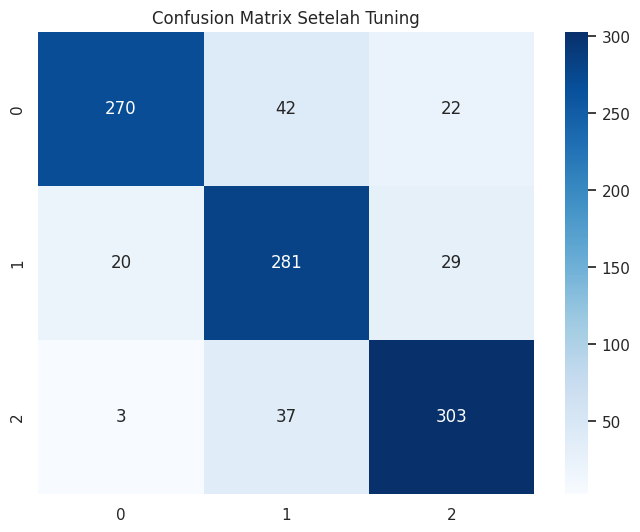

In [ ]:
# Prediksi dan evaluasi di data test
y_test_pred = best_rf.predict(X_test)
print("Classification Report setelah tuning:")
print(classification_report(y_test, y_test_pred))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Setelah Tuning')

**Insight:**

Setelah dilakukan tuning pada model klasifikasi, diperoleh performa yang cukup memuaskan dengan akurasi sebesar 85%. Ini menunjukkan bahwa model cukup baik dalam mengklasifikasikan status mahasiswa menjadi tiga kategori: Dropout, Enrolled, dan Graduate.

* Dropout (Label 0)

  Precision sebesar 0.92 menandakan prediksi untuk mahasiswa dropout sangat akurat, namun recall-nya 0.81, menunjukkan masih ada sebagian mahasiswa dropout yang tidak terdeteksi dengan baik. Confusion matrix menunjukkan 270 dari 334 mahasiswa dropout berhasil diklasifikasikan dengan benar, sementara sisanya sering tertukar dengan status Enrolled (42 kasus) dan Graduate (22 kasus).

* Enrolled (Label 1)

  Model memiliki precision 0.78 dan recall 0.85, yang berarti model cukup baik dalam mengenali mahasiswa yang masih aktif, meskipun ada kesalahan prediksi ke Graduate (29 kasus) dan Dropout (20 kasus). Total 281 dari 330 mahasiswa enrolled berhasil diklasifikasikan dengan benar.

* Graduate (Label 2)

  Dengan precision 0.86 dan recall 0.88, ini merupakan label dengan performa paling stabil. Sebanyak 303 dari 343 mahasiswa graduate berhasil diprediksi dengan benar, dan sebagian kecil tertukar menjadi Enrolled (37 kasus) atau Dropout (3 kasus).

Kesimpulan:

Model bekerja paling baik dalam mengenali mahasiswa Graduate, diikuti oleh Enrolled, dan terakhir Dropout. Walaupun akurasi sudah cukup tinggi (85%), masih terdapat area yang bisa ditingkatkan, terutama dalam membedakan antara Dropout dan Enrolled yang cukup sering tertukar.


## **7. Save Model**
Tahapan ini adalah menyimpan model yang telah selesai.

In [ ]:
#Save model
joblib.dump(best_rf, 'model.pkl')

['model.pkl']

## **8. Recommendation untuk Tim Institut Pendidikan**
Tapahan ini merupakan memberikan rekomendasi kepada tim institut pendidikan berdasarkan hasil EDA dan pengembangan model


Berdasarkan hasil Exploratory Data Analysis dan pengembangan model ini, berikut adalah tiga rekomendasi utama yang dapat dilakukan oleh Institut Pendidikan Jaya Jaya:

**1. Prediksi Mahasiswa Berisiko Dropout dengan Model Machine Learning**

Model Random Forest yang dikembangkan berhasil mengklasifikasikan status akhir mahasiswa dengan performa yang baik, terutama setelah dilakukan penyeimbangan data menggunakan SMOTE.

Rekomendasi Aksi:
* Gunakan model ini untuk memantau mahasiswa aktif yang menunjukkan pola berisiko tinggi (misalnya nilai rendah, tunggakan UKT, tidak lulus banyak mata kuliah di semester awal).
* Terapkan intervensi seperti konseling akademik, beasiswa tambahan, atau mentoring satu-satu untuk mahasiswa dalam kelompok risiko.

**2. Evaluasi dan Latih Ulang Model Secara Berkala**

Agar model tetap relevan dengan kondisi mahasiswa tiap angkatan, pelatihan ulang (retraining) dan validasi perlu dilakukan secara periodik dengan data terbaru.

Rekomendasi Aksi:
* Jadwalkan evaluasi performa model setiap akhir semester atau tahun ajaran.
* Lakukan retraining menggunakan data mahasiswa terbaru agar model tidak mengalami penurunan akurasi karena perubahan tren atau kebijakan.

**3. Validasi Model Lintas Angkatan untuk Generalisasi yang Kuat**

Untuk memastikan keandalan prediksi di masa depan, model perlu diuji pada data dari tahun ajaran yang berbeda guna menghindari overfitting terhadap angkatan tertentu.

Rekomendasi Aksi:
* Lakukan validasi silang menggunakan data dari beberapa tahun akademik.
* Gunakan hasil validasi ini sebagai dasar pengambilan keputusan jangka panjang dan pengembangan sistem prediksi internal.